In [1]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import arviz as az
import matplotlib.cm as cm
import pytensor as pt
import pdfplumber
import xarray as xr
sns.set_style("whitegrid")

### Read beta and gamma estimates from various sources

In [127]:
# CMIP6 data
cmip6_beta_4xCO2 = np.load('saved_data/cmip6_beta_4xCO2.npy')
cmip6_gamma_4xCO2 = np.load('saved_data/cmip6_gamma_4xCO2.npy')

# 

In [74]:
evidence_CMIP6={}
evidence_CMIP6['beta_land']=cmip6_beta_4xCO2
evidence_CMIP6['gamma_land']=cmip6_gamma_4xCO2

In [70]:
# process grouping
cmip6_models = np.array(['ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CanESM5', 'CESM2', 'CNRM-ESM2-1', 'GFDL-ESM4', 'IPSL-CM6A-LR', 'MIROC-ES2L', 'MPI-ESM1-2-LR', 'NorESM2-LM', 'UKESM1-0-LL', 'EC-Earth3-CC', 'CMCC-ESM2'])

cmip6_hasNitro = np.array([True, False, False, True, False, False, False, True, True, True, True, True, True])
cmip6_hasPF = np.array([False, False, False, True, False, False, False, False, False, True, False, False, True])
cmip6_hasFire = np.array([False, False, False, True, True, True, False, False, True, True, False, True, True])
cmip6_hasDynveg = np.array([False, False, False, False, False, True, False, False, True, False, True, True, False])

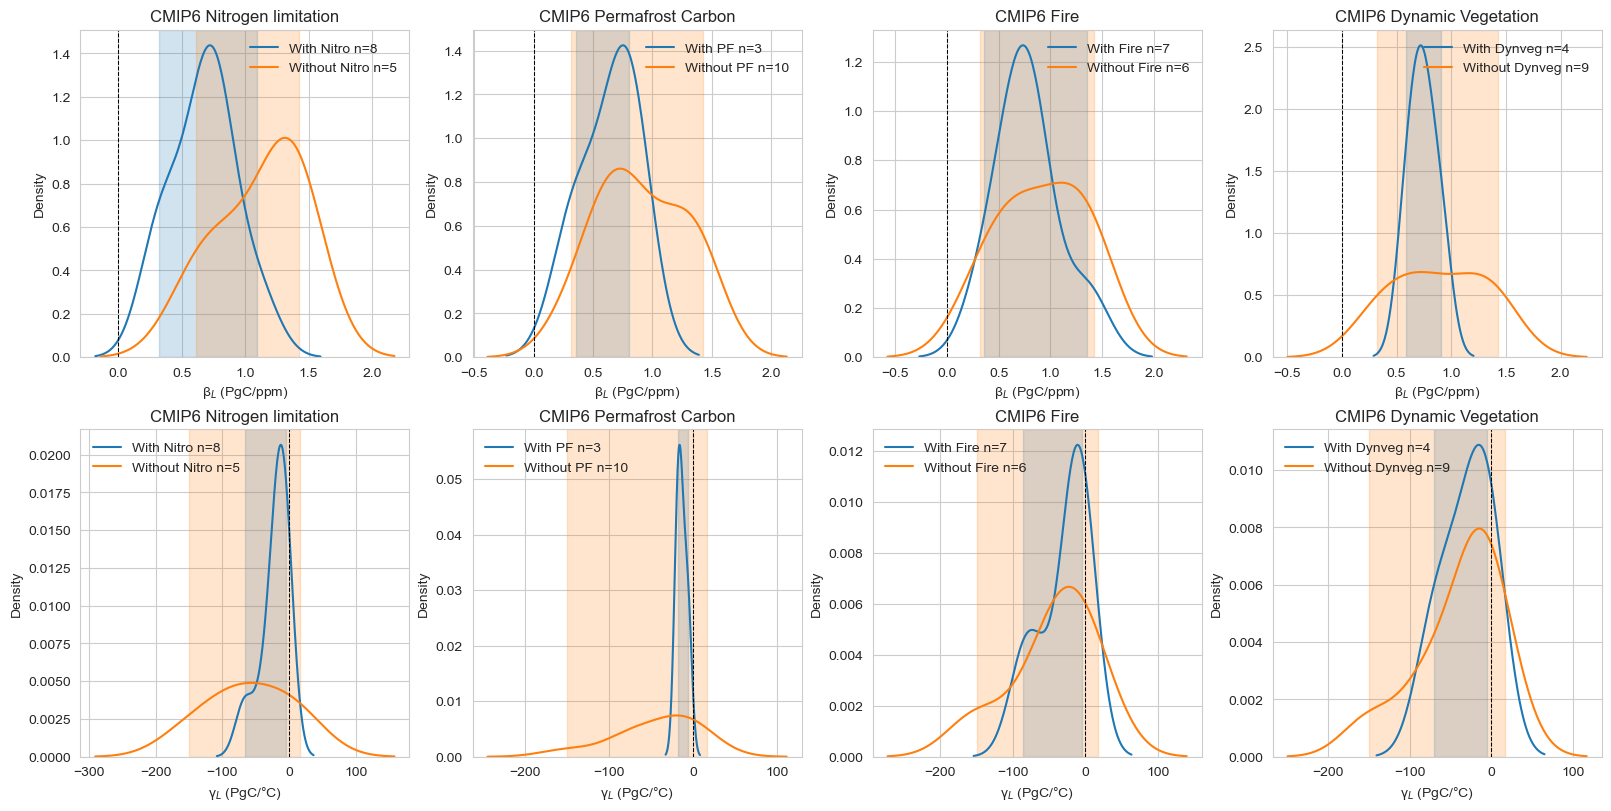

In [126]:
# sanity check

fig = plt.figure(figsize=(16,8), layout="constrained")

sub = fig.add_subplot(2, 4, 1)
sub.set_title('CMIP6 Nitrogen limitation')
sub.set_xlabel('β${_L}$ (PgC/ppm)')
sns.kdeplot(evidence_CMIP6['beta_land'][cmip6_hasNitro],label="With Nitro n="+str(len(evidence_CMIP6['beta_land'][cmip6_hasNitro])))
sns.kdeplot(evidence_CMIP6['beta_land'][~cmip6_hasNitro],label="Without Nitro n="+str(len(evidence_CMIP6['beta_land'][~cmip6_hasNitro])))
sub.axvline(0, color='k', linestyle='--', lw=0.75)
sub.axvspan(min(evidence_CMIP6['beta_land'][cmip6_hasNitro]), max(evidence_CMIP6['beta_land'][cmip6_hasNitro]), color='tab:blue', alpha=0.2)
sub.axvspan(min(evidence_CMIP6['beta_land'][~cmip6_hasNitro]), max(evidence_CMIP6['beta_land'][~cmip6_hasNitro]), color='tab:orange', alpha=0.2)
sub.legend(frameon=False, loc='upper right')

sub = fig.add_subplot(2, 4, 2)
sub.set_title('CMIP6 Permafrost Carbon')
sub.set_xlabel('β${_L}$ (PgC/ppm)')
sns.kdeplot(evidence_CMIP6['beta_land'][cmip6_hasPF],label="With PF n="+str(len(evidence_CMIP6['beta_land'][cmip6_hasPF])))
sns.kdeplot(evidence_CMIP6['beta_land'][~cmip6_hasPF],label="Without PF n="+str(len(evidence_CMIP6['beta_land'][~cmip6_hasPF])))
sub.axvline(0, color='k', linestyle='--', lw=0.75)
sub.axvspan(min(evidence_CMIP6['beta_land'][cmip6_hasPF]), max(evidence_CMIP6['beta_land'][cmip6_hasPF]), color='tab:blue', alpha=0.2)
sub.axvspan(min(evidence_CMIP6['beta_land'][~cmip6_hasPF]), max(evidence_CMIP6['beta_land'][~cmip6_hasPF]), color='tab:orange', alpha=0.2)
sub.legend(frameon=False, loc='upper right')

sub = fig.add_subplot(2, 4, 3)
sub.set_title('CMIP6 Fire')
sub.set_xlabel('β${_L}$ (PgC/ppm)')
sns.kdeplot(evidence_CMIP6['beta_land'][cmip6_hasFire],label="With Fire n="+str(len(evidence_CMIP6['beta_land'][cmip6_hasFire])))
sns.kdeplot(evidence_CMIP6['beta_land'][~cmip6_hasFire],label="Without Fire n="+str(len(evidence_CMIP6['beta_land'][~cmip6_hasFire])))
sub.axvline(0, color='k', linestyle='--', lw=0.75)
sub.axvspan(min(evidence_CMIP6['beta_land'][cmip6_hasFire]), max(evidence_CMIP6['beta_land'][cmip6_hasFire]), color='tab:blue', alpha=0.2)
sub.axvspan(min(evidence_CMIP6['beta_land'][~cmip6_hasFire]), max(evidence_CMIP6['beta_land'][~cmip6_hasFire]), color='tab:orange', alpha=0.2)
sub.legend(frameon=False, loc='upper right')

sub = fig.add_subplot(2, 4, 4)
sub.set_title('CMIP6 Dynamic Vegetation')
sub.set_xlabel('β${_L}$ (PgC/ppm)')
sns.kdeplot(evidence_CMIP6['beta_land'][cmip6_hasDynveg],label="With Dynveg n="+str(len(evidence_CMIP6['beta_land'][cmip6_hasDynveg])))
sns.kdeplot(evidence_CMIP6['beta_land'][~cmip6_hasDynveg],label="Without Dynveg n="+str(len(evidence_CMIP6['beta_land'][~cmip6_hasDynveg])))
sub.axvline(0, color='k', linestyle='--', lw=0.75)
sub.axvspan(min(evidence_CMIP6['beta_land'][cmip6_hasDynveg]), max(evidence_CMIP6['beta_land'][cmip6_hasDynveg]), color='tab:blue', alpha=0.2)
sub.axvspan(min(evidence_CMIP6['beta_land'][~cmip6_hasDynveg]), max(evidence_CMIP6['beta_land'][~cmip6_hasDynveg]), color='tab:orange', alpha=0.2)
sub.legend(frameon=False, loc='upper right')

sub = fig.add_subplot(2, 4, 5)
sub.set_title('CMIP6 Nitrogen limitation')
sub.set_xlabel('γ${_L}$ (PgC/°C)')
sns.kdeplot(evidence_CMIP6['gamma_land'][cmip6_hasNitro],label="With Nitro n="+str(len(evidence_CMIP6['gamma_land'][cmip6_hasNitro])))
sns.kdeplot(evidence_CMIP6['gamma_land'][~cmip6_hasNitro],label="Without Nitro n="+str(len(evidence_CMIP6['gamma_land'][~cmip6_hasNitro])))
sub.axvline(0, color='k', linestyle='--', lw=0.75)
sub.axvspan(min(evidence_CMIP6['gamma_land'][cmip6_hasNitro]), max(evidence_CMIP6['gamma_land'][cmip6_hasNitro]), color='tab:blue', alpha=0.2)
sub.axvspan(min(evidence_CMIP6['gamma_land'][~cmip6_hasNitro]), max(evidence_CMIP6['gamma_land'][~cmip6_hasNitro]), color='tab:orange', alpha=0.2)
sub.legend(frameon=False, loc='upper left')

sub = fig.add_subplot(2, 4, 6)
sub.set_title('CMIP6 Permafrost Carbon')
sub.set_xlabel('γ${_L}$ (PgC/°C)')
sns.kdeplot(evidence_CMIP6['gamma_land'][cmip6_hasPF],label="With PF n="+str(len(evidence_CMIP6['gamma_land'][cmip6_hasPF])))
sns.kdeplot(evidence_CMIP6['gamma_land'][~cmip6_hasPF],label="Without PF n="+str(len(evidence_CMIP6['gamma_land'][~cmip6_hasPF])))
sub.axvline(0, color='k', linestyle='--', lw=0.75)
sub.axvspan(min(evidence_CMIP6['gamma_land'][cmip6_hasPF]), max(evidence_CMIP6['gamma_land'][cmip6_hasPF]), color='tab:blue', alpha=0.2)
sub.axvspan(min(evidence_CMIP6['gamma_land'][~cmip6_hasPF]), max(evidence_CMIP6['gamma_land'][~cmip6_hasPF]), color='tab:orange', alpha=0.2)
sub.legend(frameon=False, loc='upper left')

sub = fig.add_subplot(2, 4, 7)
sub.set_title('CMIP6 Fire')
sub.set_xlabel('γ${_L}$ (PgC/°C)')
sns.kdeplot(evidence_CMIP6['gamma_land'][cmip6_hasFire],label="With Fire n="+str(len(evidence_CMIP6['gamma_land'][cmip6_hasFire])))
sns.kdeplot(evidence_CMIP6['gamma_land'][~cmip6_hasFire],label="Without Fire n="+str(len(evidence_CMIP6['gamma_land'][~cmip6_hasFire])))
sub.axvline(0, color='k', linestyle='--', lw=0.75)
sub.axvspan(min(evidence_CMIP6['gamma_land'][cmip6_hasFire]), max(evidence_CMIP6['gamma_land'][cmip6_hasFire]), color='tab:blue', alpha=0.2)
sub.axvspan(min(evidence_CMIP6['gamma_land'][~cmip6_hasFire]), max(evidence_CMIP6['gamma_land'][~cmip6_hasFire]), color='tab:orange', alpha=0.2)
sub.legend(frameon=False, loc='upper left')

sub = fig.add_subplot(2, 4, 8)
sub.set_title('CMIP6 Dynamic Vegetation')
sub.set_xlabel('γ${_L}$ (PgC/°C)')
sns.kdeplot(evidence_CMIP6['gamma_land'][cmip6_hasDynveg],label="With Dynveg n="+str(len(evidence_CMIP6['gamma_land'][cmip6_hasDynveg])))
sns.kdeplot(evidence_CMIP6['gamma_land'][~cmip6_hasDynveg],label="Without Dynveg n="+str(len(evidence_CMIP6['gamma_land'][~cmip6_hasDynveg])))
sub.axvline(0, color='k', linestyle='--', lw=0.75)
sub.axvspan(min(evidence_CMIP6['gamma_land'][cmip6_hasDynveg]), max(evidence_CMIP6['gamma_land'][cmip6_hasDynveg]), color='tab:blue', alpha=0.2)
sub.axvspan(min(evidence_CMIP6['gamma_land'][~cmip6_hasDynveg]), max(evidence_CMIP6['gamma_land'][~cmip6_hasDynveg]), color='tab:orange', alpha=0.2)
sub.legend(frameon=False, loc='upper left')
